# Deterministic Diffusion Models (DDM): Utilities
> For the Fall 2024 course: *Machine Learning in Physics*<br>
> Created: Aug. 14, 2024 Harrison B. Prosper

## Introduction
Let $x_t \equiv x(t) \in \mathbb{R}^d$ be a $d$-dimensional vector defined on the domain $t \in [0, 1]$. Let $x_0 \sim p(x)$ be the **initial state** sampled from the probability density $p(x)$ and $x_1$ be the **terminal state**, that is, the state at the end of the trajectory that begins with $x_0$. Following the notation of [1], the path from $x_0$ to $x_1$ is the solution of the **forward stochastic differential equation** (SDE)
\begin{align}
    dx_t = {\color{blue}f(t) x_t dt} + {\color{magenta}g(t) dW_t},
\end{align}
where ${\color{blue}f(t) x_t dt}$, the **drift term**, is deteministic and ${\color{magenta}g(t) dW_t} = g(t) z \sqrt{dt}$ is a **stochastic term** with $z \sim {\cal N}(0, \mathbf{I}_d)$ a $d$-dimensional random variable from a diagonal $d$-dimensional standard normal.  Because of the stochastic term $x_t$ is also a random variable. One might be tempted to write the above equation in terms of $dx_t / dt$,  however, the path from $x_0$ to $x_t$ is infinitely corrugated and, consequently, is nowhere differentiable!  

In [1] it is shown that if one chooses
\begin{align}
    f(t) & = \frac{d\log\alpha_t}{dt}, &\quad \alpha_t \equiv \alpha(t),\\
    g^2(t) & = \frac{d\sigma_t^2}{dt} - 2 f(t) \sigma_t^2, &\quad \sigma_t \equiv \sigma(t), 
 \end{align}
then the conditional probability density of $x_t$ is given by 
\begin{align}
p(x_t | x_0) & = {\cal N}(x_t; \alpha_t x_0, \, \sigma^2_t \mathbf{I}), \\
 & = \prod_{i=1}^d {\cal N}(x_{t, i}; \alpha_t x_{0,i}, \sigma_t^2),\\
 & = \frac{1}{(\sigma \sqrt{2\pi})^d} \exp\left[ -\frac{1}{2}\sum_{i=1}^d \left( \frac{x_{t, i} - \alpha(t) \, x_{0, i}}{\sigma(t)} \right)^2 \right],
\end{align}
where $x_{t, i} \equiv x_i(t)$ is the $i^\text{th}$ component of the $d$-dimensional vector $x(t)$. Defining the $d$-dimensional vector
\begin{align}
    z(t) & = \frac{x(t) - \alpha(t) \, x(0)}{\sigma(t)} ,
\end{align}
we can write
\begin{align}
p(x_t | x_0) & \equiv p(x(t) | x(0)), \\
 & \propto \exp \left(-\frac{1}{2}  z^2 \right). 
\end{align}

If $\alpha_t$ is chosen so that it goes to zero as $t \rightarrow 1$ and $\sigma_t$ remains finite in that limit then the terminal state $x_1$ will be distributed according to a zero mean diagonal $d$-dimensional normal with variance $\sigma_1^2$ irrespective of the initial state $x_0$. The $d$-dimensional Gaussian is a **fixed point** of the SDE. 
Bao *et al.* [2] suggest the following choices
\begin{align}
    \alpha_t & = 1 - t, \\
    \sigma_t^2 & = t .
\end{align}
We use
\begin{align}
    \alpha_t & = 1 - t, \\
    \sigma_t & = t .
\end{align}

## Reverse-Time Ordinary Differential Equation (ODE)
Even more remarkable than the above is the existence of a mechanism to go from $x_1$ to $x_0$.
In [2] Feng Bao *et al.* note the striking mathematical fact that the reverse-time ODE
\begin{align}
    dx_t & = \left[f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t)\right] dt, \quad S(t, x_t) \equiv \nabla_{x_t} \log p(x_t),
\end{align}
where $p(x_t)$ is the probability density of $x_t$ and $S(x_t, t)$ is the **score funtion** associated with $p(x_t)$ can be used 
to map $x_t$ back to $x_0$ *deterministically*.  This is remarkable! Moreover, because these $d$ equations are ordinary differential equations we can rewrite the above as
\begin{align}
    \frac{d x_t}{dt} &= G(t, x_t), \, \, \text{ where} \\
    G(t, x_t) & = f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t) .
\end{align}
The key technical task in using this equation is computing the score function, 
\begin{align}
    S(t, x_t)
                & = \frac{1}{p(x_t)}\nabla_{x_t} p(x_t), \quad p(x_t) = \int_{\mathbb{R}^d}   p(x_t | x_0) \, p(x_0) \, dx_0, \nonumber\\
        & = -\frac{1}{p(x_t)}\int_{\mathbb{R}^d} \left(\frac{x_t - \alpha_t x_0}{\sigma_t^2} \right) p(x_t | x_0) \, p(x_0) \, dx_0,\nonumber\\
        & = - \frac{1}{\sigma_t^2} \left(x_t - \alpha_t \int_{\mathbb{R}^d}  x_0 \, \frac{p(x_t | x_0) \, p(x_0)}{p(x_t)} \, dx_0 \right),\\
\rightarrow \, -\sigma_t^2 \,     S(t, x_t)        & = x_t - \alpha_t \, q(t, x_t),
\end{align}
where the vector
\begin{align}
 q(t, x_t) = \int_{\mathbb{R}^d}  x_0 \, p(x_0 | x_t) \, dx_0,  
\end{align}
is the conditional expectation of the state $x_0$ at $t = 0$ given the state $x_t$ at time $t$. Following [1], $g^2(t)$ can be re-expressed as follows,
\begin{align}
    g^2(t) & = \frac{d\sigma_t^2}{dt} - 2 f(t) \sigma_t^2,\nonumber\\
    & = 2 \sigma_t \frac{d\sigma_t}{dt} - 2 \frac{d\log\alpha_t}{dt} \sigma_t^2,\nonumber\\
    & = 2 \sigma_t^2 \frac{d\log\sigma_t}{dt} - 2 \frac{d\log\alpha_t}{dt} \sigma_t^2,\nonumber\\
\rightarrow \quad    -\frac{1}{2} g^2(t) & = \sigma_t^2 \frac{d\log\alpha_t/\sigma_t}{dt}.
\end{align}
Then we can rewrite $G(t, x_t)  = f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t)$ as follows
\begin{align}
 G(t, x_t) & = f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t),\nonumber\\
     & = \frac{d\log\alpha_t}{dt} \, x_t +  \frac{d\log\alpha_t/\sigma_t}{dt} 
     \sigma_t^2 S(t, x_t),
     \nonumber\\
     & = \frac{d\log\alpha_t}{dt} \, x_t + \frac{d\log\alpha_t/\sigma_t}{dt} 
     (\alpha_t \, q(t, x_t) - x_t), 
     \nonumber\\
     & = \frac{d\log\sigma_t}{dt} \, x_t  + \alpha_t \, \frac{d\log\alpha_t/\sigma_t}{dt} 
     \, q(t, x_t), 
     \nonumber\\
     & = \lambda(t) \, x_t + \mu(t)
     \, q(t, x_t), \text{ where}
     \\ \nonumber\\
   \lambda(t) = \lambda_t  & \equiv \frac{d\log\sigma_t}{dt} \text{ and }\\
   \mu(t) = \mu_t & \equiv \alpha_t \frac{d\log\alpha_t/\sigma_t}{dt}.
\end{align}

If we set $\alpha_t = 1 - t$ and $\sigma_t = t$, we have $\lambda(t) = t^{-1}$ and $\mu(t) = -t^{-1}$ and, therefore,
\begin{align}
    \frac{dx_t}{dt} &= \lambda_t \, x_t + \mu_t \, q(t, x_t),\nonumber\\
    \frac{dx_t}{dt} &= [ x_t  - q(t, x_t) ] t^{-1} \equiv G(t, x_t).
\end{align}

## Approximating $q(t, x_t)$
Bao *et al.* propose to approximate the integrals over $\mathbb{R}^d$ using Monte Carlo integration. Writing 
$q(x_t)$ as
\begin{align}
q(t, x_t) & = \int_{\mathbb{R}^d}  x_0 \, p(x_0 | x_t) \, dx_0 , \\
& =  \int_{\mathbb{R}^d}  x_0 \, \frac{p(x_t | x_0) \, p(x_0)}{p(x_t)} \, dx_0,\\
                    & = \int_{\mathbb{R}^d}  x_0 \, \lambda(x_t, x_0) \, p(x_0) \, dx_0 ,  \quad\text{where the ratio } \lambda(x_t, x_0) = \frac{p(x_t | x_0)}{p(x_t)},
\end{align}
we can approximate the integrals as follows, 
\begin{align}
        q(t, x_t)  & \approx \frac{1}{N} \sum_{n=1}^N x_0^{(n)} \, \lambda(x_t, x_0^{(n)}), \quad \lambda(x_t, x_{0,n}) \approx \frac{p(x_t | x_0^{(n)})}{\frac{1}{N}\sum_{m=1}^N p(x_t | x_0^{(m)})},\\
        & =  \sum_{n=1}^N x_0^{(n)} \, w(x_t, x_0^{(n)}), 
        \quad\text{where } \\
w(x_t, x_0^{(n)}) & = \frac{p(x_t | x_0^{(n)})}{\sum_{m=1}^N p(x_t | x_0^{(m)})},                
\end{align}
and $\{ x_0^{(n)} \}, n = 1,\cdots, N$ is a sample drawn from $p(x_0)$. 

The function $\lambda(x_t, x_0)$ has an interesting interpretation as can be seen by writing it as follows,
\begin{align}
    \lambda(x_t, x_0) & = \frac{p(x_t| x_0)}{p(x_t)}, \nonumber\\
    & = \frac{p(x_t| x_0) \, p(x_0)}{p(x_t) \, p(x_0)}, \nonumber\\
    & = \frac{p(x_t, x_0)}{p(x_t) \, p(x_0)}.
\end{align}
The function $\lambda(x_t, x_0)$ measures the degree to which the variables $x_t$ and $x_0$ are statistically independent.

### An alternative approach
Notice that
\begin{align}
q(t, x_t) 
& =  \int_{\mathbb{R}^d}  x_0 \, \frac{p(x_t | x_0) \, p(x_0)}{p(x_t)} \, dx_0,\nonumber\\
& =  \frac{\int_{\mathbb{R}^d}  x_0 \, p(x_t | x_0) \, p(x_0) \, dx_0}{\int_{\mathbb{R}^d}  \, p(x_t | x_0) \, p(x_0) \, dx_0}.
\end{align}
This suggests that it may be useful to define the vector-valued function, $I$, where the components $I_i$, $i = 1,\cdots, d$ are given by
\begin{align}
I_i(t, x_t, \beta) 
& \equiv  \int_{\mathbb{R}^d}  e^{-\beta x_{0, i}} \, p(x_t | x_0) \, p(x_0) \, dx_0, \nonumber\\
    & = \mathbb{E}_{p(x_0)}[e^{-\beta x_{0, i}} \, p(x_t | x_0) ], \\
   & \approx \frac{1}{N} \sum_{n=1}^N \exp\left[-\left(\beta x_{0,i}^{(n)} + \frac{1}{2} z^{(n)} \cdot z^{(n)} \right)\right], \quad z^{(n)} = \frac{x_t - \alpha(t) \, x_0^{(n)}}{\sigma(t)}.
\end{align}
We can then write
\begin{align}
q(t, x_t) & = -\left. \frac{1}{I(t, x_t, \beta)} \frac{d I(t, x_t, \beta)}{d\beta}\right|_{\beta=0}  , \nonumber\\
     & = -\left. \frac{d \log I(t, x_t, \beta)}{d\beta}\right|_{\beta=0} .
\end{align}

## Implicit solution

If multiply
\begin{align}
    \frac{dx_t}{dt} &= [ x_t  - q(t, x_t) ] t^{-1} \equiv G(t, x_t), \nonumber
\end{align}
throughout by the integrating factor $t^{-1}$, we can write
\begin{align}
    t^{-1}\frac{dx_t}{dt} -  t^{-2} x_t & = - t^{-2} \, q(t, x_t) , \nonumber\\
    \frac{d}{dt} t^{-1} x_t & = - t^{-2} \, q(t, x_t) , \\
\end{align}
and, therefore, arrive at
\begin{align}
    t_2^{-1} x_{t_2}  & = t_1^{-1} x_{t_1}  - \int_{s=t_1}^{s=t_2} \frac{q(s, x_s)}{s^2} \, ds, \\
    x_{t_2}  & = \frac{t_2}{t_1} x_{t_1} - t_2 \int_{s=t_1}^{s=t_2} \, \frac{q(s, x_s)}{s^2} \, ds.
\end{align}

### References
  1. Cheng Lu†, Yuhao Zhou†, Fan Bao†, Jianfei Chen†, Chongxuan Li‡, Jun Zhu, *DPM-Solver: A Fast ODE Solver for Diffusion Probabilistic Model Sampling in Around 10 Steps*, arXiv:2206.00927v3, 13 Oct 2022.
  1. Yanfang Lui, Minglei Yang, Zezhong Zhang, Feng Bao, Yanzhao Cao, and Guannan Zhang, *Diffusion-Model-Assisted Supervised Learning of Generative Models for Density Estimation*, arXiv:2310.14458v1, 22 Oct 2023

In [5]:
import os
import numpy as np

# standard research-level machine learning toolkit from Meta (FKA: FaceBook)
import torch
import torch.nn as nn

import sympy as sm
sm.init_printing() 

# standard module for high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation

from tqdm import tqdm

In [11]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'\n\tComputational device: {str(DEVICE):4s}\n')


	Computational device: cpu 



## Reverse Time ODE
The reverse-time ODE is given by
\begin{align}
    \frac{dx_t}{dt} &= \lambda_t \, x_t + \mu_t \, q(t, x_t) ,
\end{align}
where
\begin{align}
   \lambda(t) = \lambda_t  & \equiv \frac{d\log\sigma_t}{dt} \text{ and }\\
   \mu(t) = \mu_t & \equiv \alpha_t \frac{d\log\alpha_t/\sigma_t}{dt}.
\end{align}
A key requirement of the reverse-time ode is that $(\alpha_t / \sigma_t)^2$ is strictly decreasing function of t. Consider $\alpha_t = 1 - t$ and $\sigma_t = t + (1 - t)\sigma_0$, which yields $(1-t)^2 / (t + (1 - t)\sigma_0)^2$, which is monotonically decreasing in $t$.

Specializing to $\alpha_t = 1 - t$ and $\sigma_t = t$, we have $\lambda(t) = t^{-1}$ and $\mu(t) = -t^{-1}$ and, therefore,
\begin{align}
    \frac{dx_t}{dt} &= \lambda_t \, x_t + \mu_t \, q(t, x_t),\nonumber\\
    \frac{dx_t}{dt} &= [ x_t  - q(t, x_t) ] t^{-1} \equiv G(t, x_t),
\end{align}

### Numerical approximation
Given 
\begin{align}
    G(t - h) & = G(t) - G^\prime h + {\cal O}(h^2),\\
    \rightarrow G^\prime h & = G(t) - G(t - h) + {\cal O}(h^2).
\end{align}
Then,
\begin{align}
    x(t - h) 
    & = x(t) - x^\prime h + \frac{1}{2!} x^{\prime\prime} h^2 - {\cal O}(h^3),\\
    & = x(t) - G h + \frac{1}{2}\left[G(t, x(t)) - G(t - h, x(t-h)) \right]h - {\cal O}(h^3),\nonumber\\
    & = x(t) - \frac{1}{2}[G(t, x_t) + G(t - h, x_{t-h}) ] h - {\cal O}(h^3) ,\\
    & = x_t - \frac{1}{2}[G(t, x_t) + G(t - h, x_t - G(t, x_t) h + {\cal O}(h^2)) ] h - {\cal O}(h^3) .
\end{align}

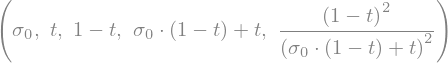

In [10]:
s0, t = sm.symbols('\sigma_0, t')
at = 1 - t
st = t + at * s0
yt = (at / st)**2
s0, t, at, st, yt

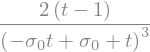

In [18]:
sm.diff(yt, t).simplify().collect(2/(-s0*t+s0+t)**3)

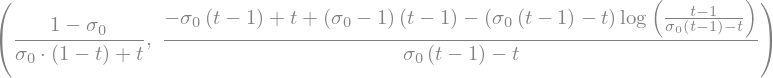

In [25]:
lt = sm.diff(sm.log(st), t)
mt = sm.diff(at*sm.log(at/st), t)
lt, mt.simplify()

In [10]:
def get_normal_sample(x):
    means = np.zeros_like(x)
    scales = np.ones_like(x)
    return torch.Tensor(np.random.normal(loc=means, scale=scales))
        
def get_batch(x, size=4000):
    ii = np.random.randint(0, len(x)-1, size)
    return torch.Tensor(x[ii])

class PyFlowODE(nn.Module):    
    '''
    Given Gaussian states x1 at t=1 compute the desired state x0 at t=0 
    by mapping x1 to x0 deterministically. x0, which is of shape (B, d), 
    where B is the batch size and d the dimension of the vector x0 = x(0), 
    is used to compute a Monte Carlo approximation of the q function. The 
    tensor x1 is of shape (N, d), where N is the number of points sampled 
    from the Gaussian. Given the numpy array X0, x0 and x1 can be created
    as follows,
        
        x0 = get_batch(X0, B).to(device)
        x1 = get_normal_sample(X0).to(device)

    Utility functions
    =================
    1. get_normal_sample(X0) returns a tensor x1, with the same shape as X0, 
    whose elements are sampled from a diagonal d-dimensional Gaussian. 

    2. get_batch(X0, B) returns a batch of points, x0, of size B from X0,
    which will be used to approximate the q-function.

    Example
    -------

    B = 5000
    N = 1000
    
    x0 = get_batch(X0, B)).to(device)
    x1 = get_normal_sample(X0[:N]).to(device)
    
    ode = PyFlowODE(x0)

    Y = ode(x1)
    
    '''
    def __init__(self, x0, T=100, savepath=False, debug=False):

        super().__init__()

        if len(x0.shape) != 2:
            raise IndexError('''
    The batch of data should be of shape (B, d), where B is
    the batch size and d is the dimensionality of the space.
            ''')

        if T < 4: T = 4

        # B: batch size
        # d: dimensionality of space
        self.B, self.d = x0.shape
        
        # change shape of x0 from (B, d) to (1, B, d)
        # so that broadcasting works correctly later.
        self.x0 = x0.unsqueeze(0)
        
        self.T = T
        self.h = 1/T
        self.savepath = savepath
        self.debug = debug

        if debug:
            print('PyFlowODE.__init__: x0.shape', x0.shape)
            print('PyFlowODE.__init__: h', self.h)

    def set_debug(self, debug=True):
        self.debug = debug
        
    def q(self, t, xt):

        debug = self.debug
            
        x0 = self.x0
        sigma_t = t
        alpha_t = 1-t

        if debug:
            print('PyFlowODE.q(BEGIN)')
            print('  PyFlowODE.q: xt.shape', xt.shape)
            print('  PyFlowODE.q: x0.shape', x0.shape)
            
        z = (xt - alpha_t * x0) / sigma_t
        # z.shape: (N, B, d)
        if debug:
            print('  PyFlowODE.q: z.shape', z.shape)
            print('  PyFlowODE.q: z', z)

        # sum over arguments of exponential, that is, over the d-dimensions
        # of each element in x0, so that we get the product of d normal densities.    
        zz = z*z
        zz = zz.sum(dim=-1) # sum over last axis
        
        # to reduce the probability of overflows,
        # subtract from zz its manimum value. This is
        # ok because exp(-zz.min()/2) will cancel in the
        # weight.
        zzmin = zz.min()
        zzmax = zz.max()
        zz -= zzmin
        
        if debug:
            print('  PyFlowODE.q: zz.shape', zz.shape)
            print('  PyFlowODE.q: zzmin, zzmax', zzmin, zzmax)
            print('  PyFlowODE.q: zz', zz)
 
        # compute unnormalized probability densities
        pt = torch.exp(-zz/2)
        # pt.shape: (N, B)
        if debug:
            print('  PyFlowODE.q: pt.shape', pt.shape)
            print('  PyFlowODE.q: pt', pt)

        # compute weight by dividing by the sum over the B Gaussian densities,
        # which, in general, is the last axis
        pt_sum = pt.sum(dim=-1)
        
        # pt_sum.shape: (N, )
        if pt_sum.any() == 0:
            raise ValueError(f'''
   pt_sum is zero at time step {t:10.3f}
            ''')

        # pt.shape: (N, B)
        # pt_sum.shape: (N, ) => (N, 1)
        wt = pt / pt_sum.unsqueeze(1)
            
        # wt.shape: (N, B)
        if debug:
            print('  PyFlowODE.q: wt.shape', wt.shape)
        
        # sum over the batch of B weighted elements of x0
        # this amounts to summing over the first axis of the array x0.
        # x0.shape: (1, B, d)
        # wt.shape: (N, B) => (N, B, 1)
        x0_wt = x0 * wt.unsqueeze(2)
        # x0_wt.shape: (N, B, d)
        if debug:
            print('  PyFlowODE.q: x0_wt.shape', x0_wt.shape)

        # sum over the batch dimension of x0_wt and reshape qt
        # so that it has the same shape as xt
        # qt.shape: (N, d) => (N, 1, d)
        qt = x0_wt.sum(dim=-2).unsqueeze(1)
        if debug:
            print('  PyFlowODE.q: qt.shape', qt.shape)
            print('PyFlowODE.q(END)')
        return qt

    def score(self, t, xt):
        qt = self.q(t, xt) # qt.shape: (N, 1, d)
        # xt and qt must be of the same shape.
        # finish calculation of the score
        st = -(xt - (1-t) * qt)/ t / t
        return st

    def G(self, t, xt):
        qt = self.q(t, xt)
        return (xt - qt)/t

    def forward(self, x1):

        debug = self.debug
        
        # check shape of input data
        if len(x1.shape) < 2:
            xt = x1.unsqueeze(0).unsqueeze(0) # shape: (1, 1, d)
        else:
            # since xt is of shape (N, d), change
            # shape of xt to (N, 1, d) and so that 
            # broadcasting with x0 (of shape (1, B, d)) 
            # works correctly.
            xt = x1.unsqueeze(1)

        N, _, d = xt.shape
        if d != self.d:
            raise ValueError('''
        The dimension of x1 must match that of x0.
            ''')
            
        savepath = self.savepath
        T = self.T
        h = self.h
        t = 1

        if debug:
            print('PyFlowODE.__call__: xt.shape', xt.shape)
            print('PyFlowODE.__call__: t', t)

        if savepath:
            y = [xt.squeeze(1)]

        G1 = self.G(t, xt)
        
        for i in tqdm(range(T-1)):
            t -= h
            if t <= 0: 
                break
                
            if debug:
                print('PyFlowODE.__call__: t', t)
                print('PyFlowODE.__call__: xt.shape', xt.shape) 
                print('PyFlowODE.__call__: G1.shape', G1.shape)
                
            G2 = self.G(t, xt - G1 * h)

            xt = xt - (G1 + G2) * h / 2
            
            G1 = G2.detach().clone()

            if savepath:
                y.append(xt.squeeze(1))

        if savepath:
            return y
        else:
            return xt.squeeze(1)

In [9]:
class Flow2DAnimation:
    '''
    Given a Python list, y, of arrays (or tensors), each of shape (N, d) where N is the
    number of data points and d=2 is the dimensionality of the space, animate the flow
    of points from a diagonal 2D, zero mean, unit variance Gaussian to the target
    distribution.

    anim = Flow2DAnimation(y)

    The animation can be saved as a gif or, if ffmpeg is available, in mp4 format using

    anim.save('flow.gif')
    anim.save('flow.mp4')

    Parameters
    ----------
        data :      Python list of data objects. Each object is table (either a 2D numpy 
                    array or a 2D tensor) or shape (N, d). Each data object corresponds
                    to a time step.
        xmin, xmax: x limits [-5, 5]
        ymin, ymax: y limits [-5, 5]
        nframes :   number of frames [50]
        interval :  time between frames in milliseconds [100 ms]
        mcolor :    marker color ['blue']
        msize :     marker size [1]
        fgsize :    size of figure [(4, 4)]
        ftsize :    font size [16 pt]
    '''
    def __init__(self, data,
                 xmin=-5, xmax=5, ymin=-5, ymax=5,
                 nframes=50,     # number of frames
                 interval=100,   # time between frames in milliseconds
                 mcolor='blue',  # color of points
                 msize=1,
                 fgsize=(4, 4), 
                 ftsize=16):
        
        # cache inputs
        self.data = np.array(data)
        self.nframes = nframes
        self.interval = interval
        self.T = len(self.data)
        self.npoints, self.d = self.data[0].shape
        self.factor = self.T / nframes
        
        # set size of figure
        self.fig = plt.figure(figsize=fgsize)

        # create area for a plot 
        nrows, ncols, index = 1, 1, 1
        ax  = plt.subplot(nrows, ncols, index)
        
        self.ax = ax   # cache plot
        
        ax.set_title('Reverse Time Diffusion', pad=14)

        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        
        # create a scatter plot 
        x = self.data[0, :, 0] # initial x positions
        y = self.data[0, :, 1] # initial y positions
       
        self.scatter = ax.scatter(x, y, s=msize, c=mcolor, alpha=1)

        # matplotlib refers to the objects scatter, etc., as artists.
        # we need to place artists in a list since we need to return all of
        # them in the function update() for the animation to work correctly
        self.artists = []
        self.artists.append(self.scatter)

        # IMPORTANT: Turn off Latex processing of text; it is far too slow!
        mp.rc('text', usetex=False)

        # create a text object to display the days since the start
        self.text = ax.text(0.95*xmin, 0.80*ymin, f't: {0:5.2f}')
        self.artists.append(self.text)

        # fix the layout so that labels are a bit
        # closer to the plot
        self.fig.tight_layout()

        # don't show the above plots. Show only the animated version
        plt.close()

        # initialize animated plot
        self.ani = FuncAnimation(fig=self.fig,           # animation figure
                                 func=self.update,       # function to update plot in figure
                                 repeat=False,           # don't repeat animation
                                 frames=self.nframes,    # number of frames
                                 interval=self.interval) # time between frames (ms)

    # this is the function that updates the plot    
    def update(self, frame):
        
        print(f'\rframe: {frame:d}', end='')
        
        # get data and artists!
        data, scatter, text = self.data, self.scatter, self.text
        
        # compute index into data array (i.e., time step)
        index = np.ceil(frame * self.factor).astype(int)
        t = 1 - frame / (self.nframes-1)
        
        # display the number of days
        self.text.set_text(f't: {t:5.2f}')
        
        # display the current position of points
        x = data[index, :, 0]
        y = data[index, :, 1]
        a = np.array([x, y]).T   # we need x and y to be columns
        scatter.set_offsets(a)

        # must return artists for animation to work
        return self.artists
    
    def show(self):
        '''
        Construct and show the animation.
        '''
        plt.show()
        return self.ani
    
    def save(self, filename):
        '''
        Construct and save the animation to a file. The format of the file is
        determined from the file extension. For example, a filename with 
        extension ".gif" saves the animation as an animated gif, while one with
        extension ".mp4" saves it in mp4 format. Note: the latter requires the
        module ffmpeg.
        
    Parameters
    ----------
        filename :      Name of graphics file.
        '''
        self.ani.save(filename)